# Single channel ICA applied to OBS data 

In [1]:
import os
import numpy as np
import pandas as pd
import scipy.signal as sp
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile

from utils import *
from skimage.metrics import structural_similarity as ssim

## Synthetic data

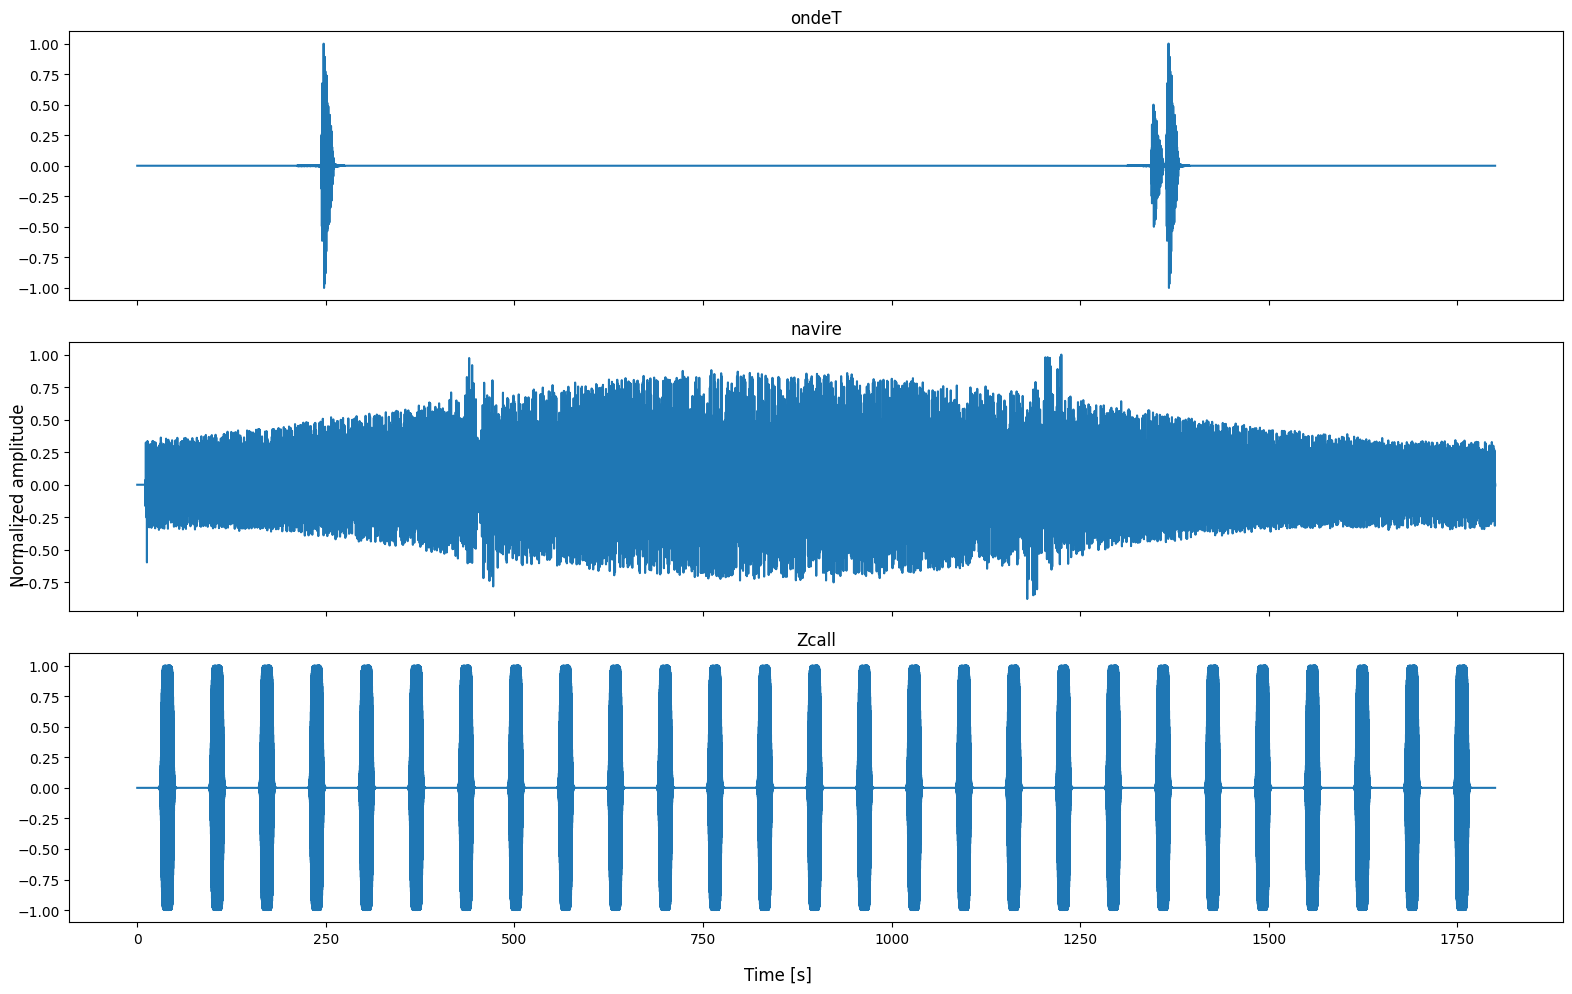

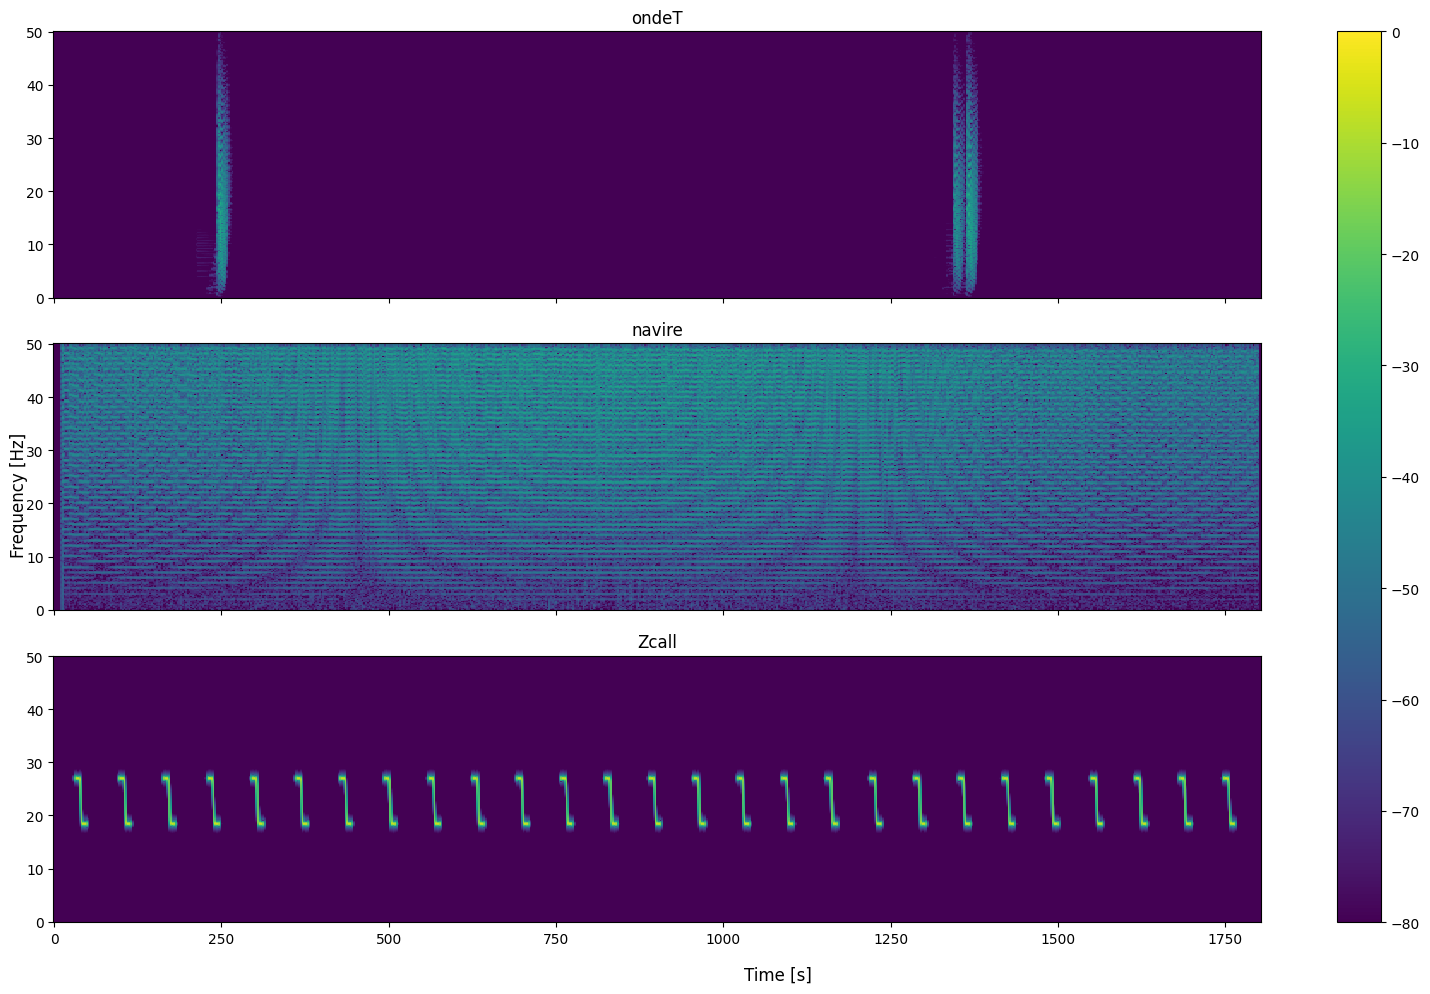

In [2]:
nperseg = 512
noverlap = 256
fs = 100

# Noise
np.random.seed(0)
snr = 5  # dB

# Root to data TODO : change to your data path
root = r"C:\Users\baptiste.menetrier\Desktop\devPy\phd\data\signaux_ica_jl"

data = load_synthetic_data(fs, nperseg, noverlap, snr=None, root=root)
plot_input_signals(data)

### Cas identique à J.L  
- Configuration type OBS : 3 récepteurs
- Mélange : uniforme (pas de bruit sur la matrice de mélange)  
- Bruit : bruit additif gaussien 
- SNR : 1dB (il me semble que J.L utilise un bruit avec un écart type de 0.1 ce qui correspond à $snr \approx 0.85$ dB)

In [3]:
snr = 1
n_rcv = 3
mixing_noise_level = 0

In [7]:
print(data["vars"])
# Mix data 
X, S, A = mix_synthetic_signals(data, mixing_noise_level=mixing_noise_level, verbose=True, n_rcv=n_rcv, snr=snr)

['ondeT', 'navire', 'Zcall']
Mixing matrix : [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


## Plot mixed signal 

Text(0.5, 1.0, 'Spectrogramme de base')

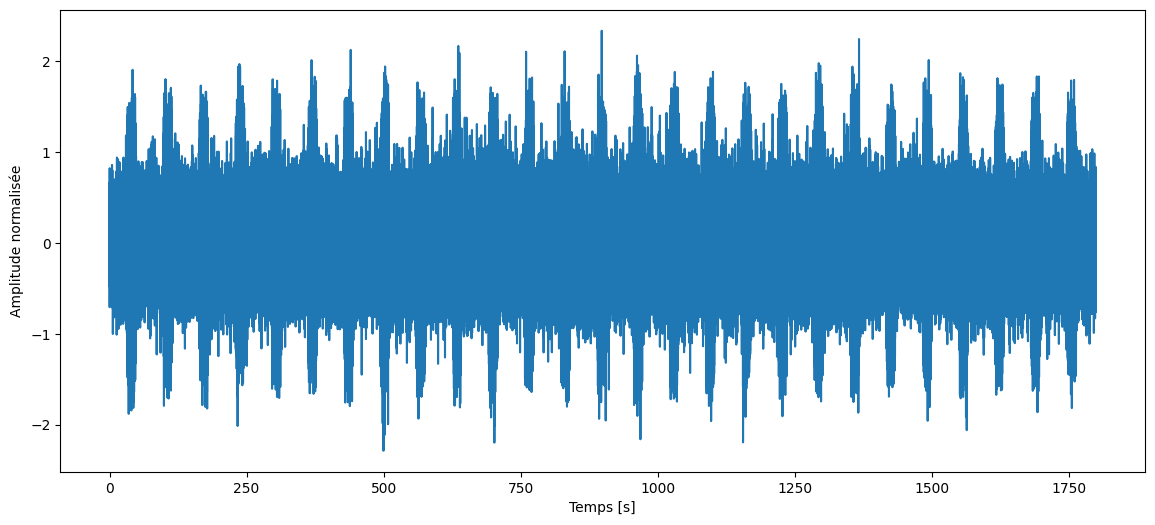

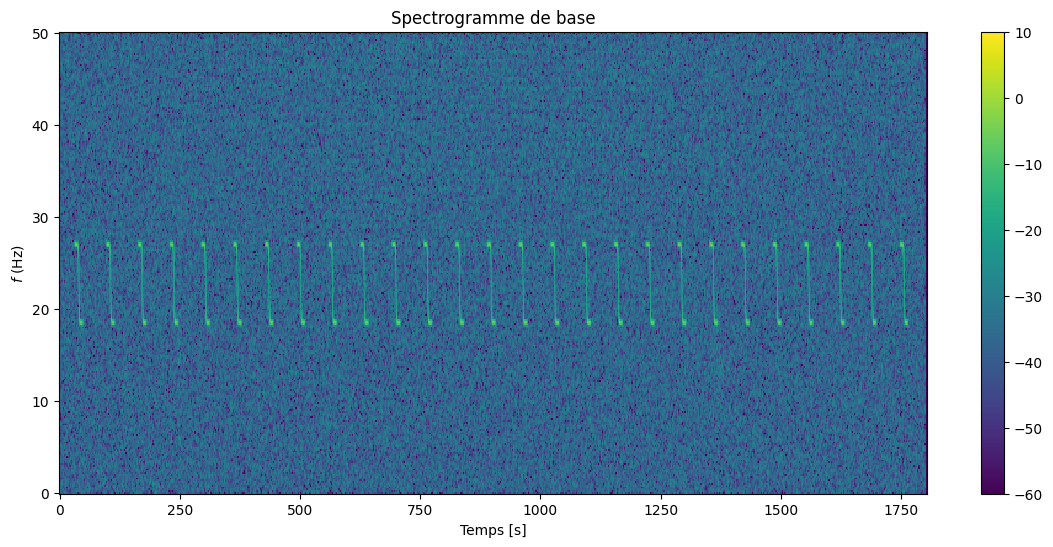

In [8]:
sig = X[:, 0]   # First component 

plt.figure(figsize=(14, 6))
plt.plot(data["time"], sig)
plt.xlabel("Temps [s]")
plt.ylabel("Amplitude normalisée")

f, t, st = sp.stft(
    sig, fs=100, window="hann", nperseg=nperseg, noverlap=noverlap
)
plt.figure(figsize=(14, 6))
plt.pcolormesh(t, f, 20 * np.log10(abs(st)))
plt.clim([-60, +10])
plt.colorbar()
plt.xlabel("Temps [s]")
plt.ylabel("$f$ (Hz)")
plt.title("Spectrogramme de base")

## Apply single channel ICA

On suit la méthode présentée dans Davies, M. E., & James, C. J. (2007). Source separation using single channel ICA. Signal Processing, 87(8), 1819–1832. https://doi.org/https://doi.org/10.1016/j.sigpro.2007.01.011

Trois étapes : 
- Pré-traitement : blanchiment 
- Séparation 
- Déblanchiment 

L'objectif est d'estimer des filtres de séparation (zero phase) : $f_i$

In [ ]:
# Select the first signal as the single channel input data
sc_data = X[:, 0]  
# Divide the into snapshots


# Apply ICA
S_, A_ = apply_ica(X, n_components=3)

## Real data 

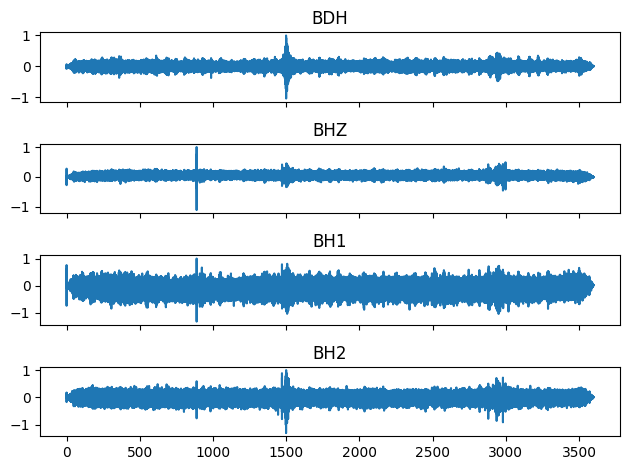

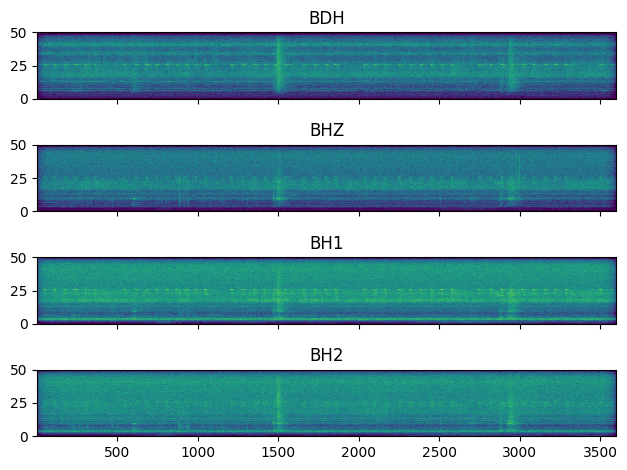

In [3]:
data = load_real_data(nperseg, noverlap)
plot_input_signals(data)